In [1]:
# import the various libaries needed to properly clean the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#the dataset
df = pd.read_csv("AB_NYC_2019.csv")

In [3]:
df.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11265,8736934,Great sun drenched room near park!,12639098,Imrul,Brooklyn,Flatbush,40.65315,-73.95538,Private room,60,1,0,NaN,NaN,1,0
14766,11673282,LUX Doorman Gym ! 2 Bedroom5179,16098958,Jeremy & Laura,Manhattan,Upper East Side,40.77688,-73.95505,Entire home/apt,250,30,1,2017-04-05,0.04,96,333
46382,35228840,UN Dream Apt NYC,153458126,Fabiana & Christopher,Manhattan,Murray Hill,40.74682,-73.97983,Entire home/apt,307,1,0,NaN,NaN,2,364
21152,16784199,Sunny And Renovated Greenwich Village Apartment!,5042847,Davide,Manhattan,Greenwich Village,40.72851,-73.99985,Entire home/apt,195,3,9,2019-06-06,0.38,1,0
10297,7880998,NoMad One Bedroom on Park Ave,41543076,Kelsey,Manhattan,Midtown,40.74321,-73.98474,Entire home/apt,175,7,1,2016-07-01,0.03,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

This shows there are some missing/null values in the dataset which includes the name , host_name, last_review, reviews_per_month. So we need on focusing and cleaning the dataset.

I also realized that the last_review column is being identified as an object but it includes that and is mant to be a date type.

In [5]:
#change the datatype of last_review to datetime
df.last_review = pd.to_datetime(df["last_review"])
df.last_review

0       2018-10-19
1       2019-05-21
2              NaT
3       2019-07-05
4       2018-11-19
           ...    
48890          NaT
48891          NaT
48892          NaT
48893          NaT
48894          NaT
Name: last_review, Length: 48895, dtype: datetime64[ns]

### HANDLING MISSING VALUES

Since there is no other better way to deal with the missing values in the name and host_name it is better to identify that is has not been given.

In [6]:
df['name'].fillna('Not Provided', inplace=True)
df['host_name'].fillna('Unknown', inplace=True)

In [7]:
# for last review
df[df['last_review'].isna()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaT,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaT,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaT,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaT,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,2


I noticed that both last_review and reviews_per_month both have the same amount of missing values. Also where last_review is null , reviews_per_month is also null.Which indicates there where no reviews in their house so the null values will be replaced with "No Review" for reviews_per_month and the median for last_review

In [8]:
median_date = df['last_review'].median()
df['last_review'].fillna(median_date, inplace=True)
df['reviews_per_month'].fillna("No Review" , inplace= True)

In [9]:
df.info()
# all missing values have been fixed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48895 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48895 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

### Identifying and Removing duplicates

In [10]:
df[df.duplicated()].count()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

No duplicates have been found in this dataset

In [11]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


### STANDARDIZATION

In [12]:
df['host_name'] = df['host_name'].str.strip().str.title()
df['room_type'] = df['room_type'].str.strip().str.title()
df['name'] = df['name'].str.strip().str.title()
#making each word being with a capital letter

In [13]:
df[['host_name','room_type','name']]

,host_name,room_type,name
0,John,Private Room,Clean & Quiet Apt Home By The Park
1,Jennifer,Entire Home/Apt,Skylit Midtown Castle
2,Elisabeth,Private Room,The Village Of Harlem....New York !
3,Lisaroxanne,Entire Home/Apt,Cozy Entire Floor Of Brownstone
4,Laura,Entire Home/Apt,Entire Apt: Spacious Studio/Loft By Central Park
...,...,...,...
48890,Sabrina,Private Room,Charming One Bedroom - Newly Renovated Rowhouse
48891,Marisol,Private Room,Affordable Room In Bushwick/East Williamsburg
48892,Ilgar & Aysel,Entire Home/Apt,Sunny Studio At Historical Neighborhood
48893,Taz,Shared Room,43Rd St. Time Square-Cozy Single Bed


In [14]:
#filtering out of bounds cordinates
df = df[(df['latitude'] >= -90) & (df['latitude'] <= 90)]
df = df[(df['longitude'] >= -180) & (df['longitude'] <= 180)]

In [16]:
df[['latitude' , 'longitude']].sample(5)

,latitude,longitude
44220,40.79100,-73.94807
2585,40.71652,-73.94309
11405,40.68930,-74.00023
24329,40.71885,-73.99514
42566,40.79342,-73.93889


### OUTLIERS DETECTION

In [17]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


I noticed the large spread of data in the price, minimum_nights , number_of_reviews, calculated_host_listings_count, availability_365 due to the large standard deviation compared to the mean or 50th percentile which shows presence of outliers and indictated that the various columns in the data set are right-skewed . 

While the reviews_per_month does not have a large standard deviation and shows it is at least close to a normal distribution but the maximum is 58 which can mean a presence of outlier.

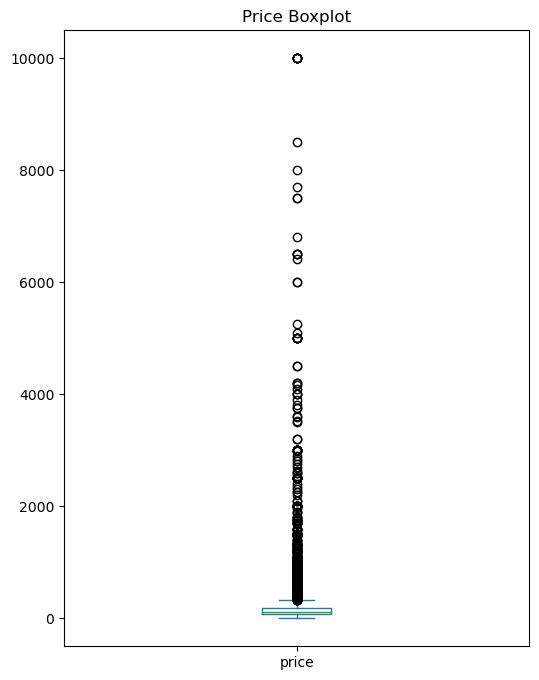

In [18]:
df['price'].plot(kind='box', figsize=(6,8), title='Price Boxplot')
plt.show()

The boxplot above shows excerssive amount of outliers in the price column.

In [21]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['price'] < Q1 - 1.5*IQR) | (df['price'] > Q3 + 1.5*IQR)]

id                                2972
name                              2972
host_id                           2972
host_name                         2972
neighbourhood_group               2972
neighbourhood                     2972
latitude                          2972
longitude                         2972
room_type                         2972
price                             2972
minimum_nights                    2972
number_of_reviews                 2972
last_review                       2972
reviews_per_month                 2972
calculated_host_listings_count    2972
availability_365                  2972
dtype: int64

In [22]:
df= df[(df['price'] >= Q1 - 1.5*IQR) & (df['price'] <= Q3 + 1.5*IQR)]

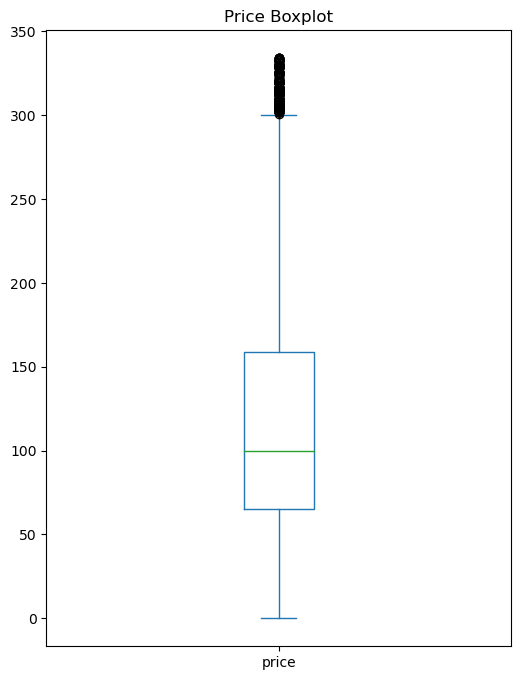

In [23]:
df['price'].plot(kind='box', figsize=(6,8), title='Price Boxplot')
plt.show()

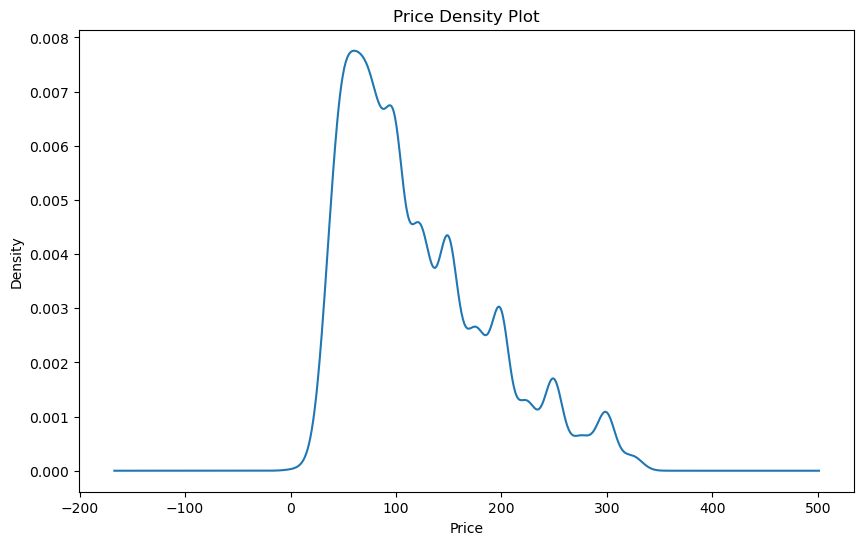

In [24]:
df['price'].plot(kind='kde', figsize=(10,6), title='Price Density Plot')
plt.xlabel('Price')
plt.show()